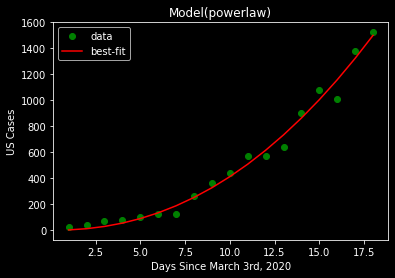

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from lmfit import Model
from lmfit.models import PowerLawModel
from lmfit import fit_report

# Choosing a set of dataframes
pickle_name = 'df_us'

# Choosing a data type
df_type = 'cases'

pickle_file = open(f'../pickles/{pickle_name}''.p', 'rb')
df_us = pickle.load(pickle_file)[df_type]
pickle_file.close()

# Nonlinear least squares starting point, using PowerLawModel
df = df_us
df = df.loc[df['day'] > 40]
df.day = df.day.apply(lambda day: day - 40)
# df = df[df.state == 'New York']
df = df.groupby('day').sum().reset_index()
df = df[['day', 'cases']]
model = PowerLawModel()
params = model.make_params()
result = model.fit(df.cases, params, x=df.day.to_list())
mpl.style.use('dark_background')
result.plot_fit(xlabel='Days Since March 3rd, 2020', ylabel='US Cases', datafmt='og', fitfmt='r')